In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/apache-access-logs/dataset-access-log-apache-web-app.xlsx


In [2]:
data = pd.read_excel("/kaggle/input/apache-access-logs/dataset-access-log-apache-web-app.xlsx")

In [3]:
data.head()

,ip,datetime,gmt,request,status,size,referer,browser,country,detected
0,114.125.221.132,2019-07-01 10:54:15,+0700],GET /bkd_baru/assets/images/scan_sertifikat/D0...,200.0,12133,http://universitas.com/bkd_baru/assets/images/...,Mozilla/5.0 (Linux; Android 5.1.1; SM-J111F Bu...,Indonesia,BAHAYA
1,114.125.221.132,2019-07-01 10:54:23,+0700],GET /bkd_baru/assets/images/scan_sertifikat/D0...,200.0,15491,http://universitas.com/bkd_baru/assets/images/...,Mozilla/5.0 (Linux; Android 5.1.1; SM-J111F Bu...,Indonesia,BAHAYA
2,114.125.221.132,2019-07-01 10:54:42,+0700],POST /bkd_baru/assets/images/scan_sertifikat/D...,200.0,16305,http://universitas.com/bkd_baru/assets/images/...,Mozilla/5.0 (Linux; Android 5.1.1; SM-J111F Bu...,Indonesia,BAHAYA
3,114.125.221.132,2019-07-01 10:55:08,+0700],GET /bkd_baru/uwubahon.php HTTP/1.1,404.0,1130,-,Mozilla/5.0 (Linux; Android 5.1.1; SM-J111F Bu...,Indonesia,BAHAYA
4,114.125.221.132,2019-07-01 10:55:28,+0700],GET /bkd_baru/awubahon.php HTTP/1.1,200.0,1735,-,Mozilla/5.0 (Linux; Android 5.1.1; SM-J111F Bu...,Indonesia,BAHAYA


In [4]:
data.shape

(37693, 10)

In [5]:
data.isna().sum()

ip             0
datetime       0
gmt            0
request        6
status       280
size         280
referer     1126
browser     1126
country        0
detected       0
dtype: int64

In [6]:
data.dropna(inplace=True)

In [7]:
data.columns

Index(['ip', 'datetime', 'gmt', 'request', 'status', 'size', 'referer',
       'browser', 'country', 'detected'],
      dtype='object')

# Feature Extraction

In [8]:
print(*list(data["request"][:10]), sep="\n")

GET /bkd_baru/assets/images/scan_sertifikat/D0001_30-06-2019_nyil.php?path=C:/xampp/htdocs/bkd_baru/application HTTP/1.1
GET /bkd_baru/assets/images/scan_sertifikat/D0001_30-06-2019_nyil.php?path=C:/xampp/htdocs/bkd_baru HTTP/1.1
POST /bkd_baru/assets/images/scan_sertifikat/D0001_30-06-2019_nyil.php?path=C:/xampp/htdocs/bkd_baru HTTP/1.1
GET /bkd_baru/uwubahon.php HTTP/1.1
GET /bkd_baru/awubahon.php HTTP/1.1
POST /bkd_baru/awubahon.php HTTP/1.1
GET / HTTP/1.1
GET /bkd_baru HTTP/1.1
GET /bkd_baru/ HTTP/1.1
GET /bkd_baru/bidang_pendidikan/edit/ODM3MA HTTP/1.1


In [9]:
data.loc[:, "request method"] = data["request"].apply(lambda r: r.split()[0])
data["request method"].unique()

array(['GET', 'POST', '-', '\\x03', 'HEAD', 'CONNECT'], dtype=object)

In [10]:
data["request method"].value_counts()

request method
GET        32874
POST        3680
-              9
\x03           2
HEAD           1
CONNECT        1
Name: count, dtype: int64

In [11]:
data = data[data["request method"].isin(["GET", "POST"])]


In [12]:
data.shape

(36554, 11)

In [13]:
data.loc[:, "request path"] = data["request"].apply(lambda r: r.split()[1])
data["request path"]

0        /bkd_baru/assets/images/scan_sertifikat/D0001_...
1        /bkd_baru/assets/images/scan_sertifikat/D0001_...
2        /bkd_baru/assets/images/scan_sertifikat/D0001_...
3                                   /bkd_baru/uwubahon.php
4                                   /bkd_baru/awubahon.php
                               ...                        
37688    /bkd_baru/assets/images/scan_kinerja/D0010__23...
37689    /bkd_baru/assets/images/scan_penugasan/D0010__...
37690    /bkd_baru/assets/images/scan_kinerja/D0010__24...
37691    /bkd_baru/assets/images/scan_kinerja/D0010__24...
37692    /bkd_baru/assets/images/scan_kinerja/D0010__18...
Name: request path, Length: 36554, dtype: object

In [14]:
data.loc[:, "request version"] = data["request"].apply(lambda r: r.split()[2])
data["request version"].unique()

array(['HTTP/1.1', 'HTTP/1.0'], dtype=object)

In [15]:
print(*list(data["browser"].head(),), sep="\n")
print(data["browser"].nunique())

Mozilla/5.0 (Linux; Android 5.1.1; SM-J111F Build/LMY47V) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/55.0.2883.91 Mobile Safari/537.36
Mozilla/5.0 (Linux; Android 5.1.1; SM-J111F Build/LMY47V) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/55.0.2883.91 Mobile Safari/537.36
Mozilla/5.0 (Linux; Android 5.1.1; SM-J111F Build/LMY47V) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/55.0.2883.91 Mobile Safari/537.36
Mozilla/5.0 (Linux; Android 5.1.1; SM-J111F Build/LMY47V) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/55.0.2883.91 Mobile Safari/537.36
Mozilla/5.0 (Linux; Android 5.1.1; SM-J111F Build/LMY47V) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/55.0.2883.91 Mobile Safari/537.36
240


In [16]:
import re
import pandas as pd

def extract_os(ua_string):
    os = "other"

    # Try to extract the content inside the first set of parentheses
    os_match = re.search(r'\(([^)]+)\)', ua_string)
    if os_match:
        os_text = os_match.group(1)

        # Match common OS names
        if 'Android' in os_text:
            os = 'Android'
        elif any(term in os_text for term in ['iPhone', 'iPad', 'iOS']):
            os = 'iOS'
        elif any(term in os_text for term in ['Mac OS', 'Macintosh']):
            os = 'MacOS'
        elif 'Windows' in os_text:
            os = 'Windows'
        elif 'Linux' in os_text:
            os = 'Linux'
        else:
            os = "other"  # fallback to raw content inside parentheses

    return os

data['os'] = data['browser'].apply(extract_os)


In [17]:
print(data["os"].unique())
print(data["os"].nunique())
print(data["os"].value_counts())

['Android' 'MacOS' 'Windows' 'other' 'Linux' 'iOS']
6
os
Windows    30954
Android     5287
MacOS        107
other         83
iOS           62
Linux         61
Name: count, dtype: int64


In [18]:
print(data.columns)

Index(['ip', 'datetime', 'gmt', 'request', 'status', 'size', 'referer',
       'browser', 'country', 'detected', 'request method', 'request path',
       'request version', 'os'],
      dtype='object')


In [19]:
print(data["datetime"].head())

0   2019-07-01 10:54:15
1   2019-07-01 10:54:23
2   2019-07-01 10:54:42
3   2019-07-01 10:55:08
4   2019-07-01 10:55:28
Name: datetime, dtype: datetime64[ns]


In [20]:
data['hour'] = data['datetime'].dt.hour
data['hour'].head()


0    10
1    10
2    10
3    10
4    10
Name: hour, dtype: int32

In [21]:
data.columns

Index(['ip', 'datetime', 'gmt', 'request', 'status', 'size', 'referer',
       'browser', 'country', 'detected', 'request method', 'request path',
       'request version', 'os', 'hour'],
      dtype='object')

In [22]:
data.dtypes


ip                         object
datetime           datetime64[ns]
gmt                        object
request                    object
status                    float64
size                       object
referer                    object
browser                    object
country                    object
detected                   object
request method             object
request path               object
request version            object
os                         object
hour                        int32
dtype: object

In [23]:
object_columns = [col for col in data.columns if data[col].dtype == 'object']
print(object_columns)
for col in object_columns:

    print(f"col is: {col}")
    print(f"sample: \n{data[col].sample(5)}")

print(data[object_columns].nunique())

['ip', 'gmt', 'request', 'size', 'referer', 'browser', 'country', 'detected', 'request method', 'request path', 'request version', 'os']
col is: ip
sample: 
17589      36.72.101.126
18354      182.0.200.119
22907     118.97.191.179
36895    207.180.211.248
2441      180.178.99.180
Name: ip, dtype: object
col is: gmt
sample: 
11932    +0700]
7866     +0700]
2477     +0700]
29106    +0700]
23545    +0700]
Name: gmt, dtype: object
col is: request
sample: 
24116             GET /bkd_baru/Bidang_pendidikan HTTP/1.1
29304    GET /bkd_baru/assets/images/scan_kinerja/D0218...
24221         GET /bkd_baru/hasil_penilaian_dosen HTTP/1.1
13754    GET /bkd_baru/assets/js/ace/elements.fileinput...
20554             GET /bkd_baru/bidang_penelitian HTTP/1.1
Name: request, dtype: object
col is: size
sample: 
26446     263024
16974          -
32555      38132
16209    2755087
12685          -
Name: size, dtype: object
col is: referer
sample: 
26708                 http://universitas.com/bkd_baru/home
78

In [24]:
import ipaddress

data.drop(columns=["request", "gmt"], inplace=True)

data['ip_numeric'] = data['ip'].apply(lambda x: int(ipaddress.IPv4Address(x)))
data['datetime_numeric'] = data['datetime'].apply(lambda x: x.timestamp())
data.drop(columns = ["ip", "datetime"], inplace=True)

object_columns = [col for col in data.columns if data[col].dtype == "object"]
print(object_columns)

['size', 'referer', 'browser', 'country', 'detected', 'request method', 'request path', 'request version', 'os']


In [25]:
non_int_values = data[~data['size'].apply(lambda x: str(x).isdigit())]['size'].unique()
print(non_int_values)
count_dash = (data['size'] == '-').sum()
print(f'The "-" value appears {count_dash} times in the size column.')

['-']
The "-" value appears 5875 times in the size column.


In [26]:
"""The country feature could introduce bias and is not a good predictor for attacks
in the real world, especially that trends might change with time.
Therefore it will be removed"""

data.drop(columns=["country"], inplace=True)

"""The 'browser' feature has complex info, this might introduce
overfitting. We already extracted the OS feature. Therefore, it will
be dropped"""

data.drop(columns=["browser"], inplace=True)

print(data.columns)

Index(['status', 'size', 'referer', 'detected', 'request method',
       'request path', 'request version', 'os', 'hour', 'ip_numeric',
       'datetime_numeric'],
      dtype='object')


In [27]:
print(data.columns)
print(len(data.columns))

Index(['status', 'size', 'referer', 'detected', 'request method',
       'request path', 'request version', 'os', 'hour', 'ip_numeric',
       'datetime_numeric'],
      dtype='object')
11


In [28]:
print(data.isna().sum())

status              0
size                0
referer             0
detected            0
request method      0
request path        0
request version     0
os                  0
hour                0
ip_numeric          0
datetime_numeric    0
dtype: int64


In [29]:
data.rename(columns = {"detected": "Label"}, inplace=True)
print(data["Label"].unique())

['BAHAYA' 'AMAN' 'DICURIGAI']


In [30]:
# Mapping from Indonesian to English
label_translation = {
    'BAHAYA': 'Attack',
    'AMAN': 'Safe',
    'DICURIGAI': 'Suspicious'
}

# Apply the translation
data['Label'] = data['Label'].map(label_translation)


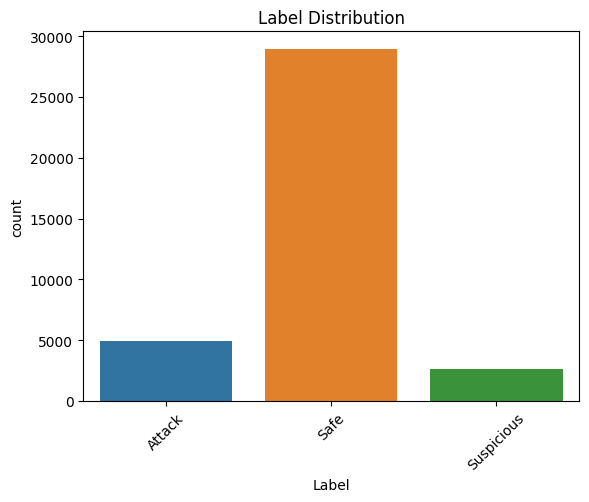

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=data, x="Label")
plt.title("Label Distribution")
plt.xticks(rotation=45)
plt.show()


In [32]:
data.to_csv("apache_logs_clean_data.csv")